In [2]:
pip install pandas pyarrow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Membaca dataset UNSW-NB15 Testing dari file parquet
df_UNSW_NB15_Testing = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\UNSW-NB15\\UNSW_NB15_testing-set.parquet")

# Menampilkan informasi lengkap dari DataFrame
df_UNSW_NB15_Testing.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   dur                82332 non-null  float32 
 1   proto              82332 non-null  category
 2   service            82332 non-null  category
 3   state              82332 non-null  category
 4   spkts              82332 non-null  int16   
 5   dpkts              82332 non-null  int16   
 6   sbytes             82332 non-null  int32   
 7   dbytes             82332 non-null  int32   
 8   rate               82332 non-null  float32 
 9   sload              82332 non-null  float32 
 10  dload              82332 non-null  float32 
 11  sloss              82332 non-null  int16   
 12  dloss              82332 non-null  int16   
 13  sinpkt             82332 non-null  float32 
 14  dinpkt             82332 non-null  float32 
 15  sjit               82332 non-null  float32 
 16  djit

In [9]:
# Mengubah label 0 menjadi 'normal' dan 1 menjadi 'attack', dan mungkin label 2 (jika ada) ke 'unknown'
df_UNSW_NB15_Testing['label'] = df_UNSW_NB15_Testing['label'].map({0: 'normal', 1: 'attack', 2: 'unknown'})

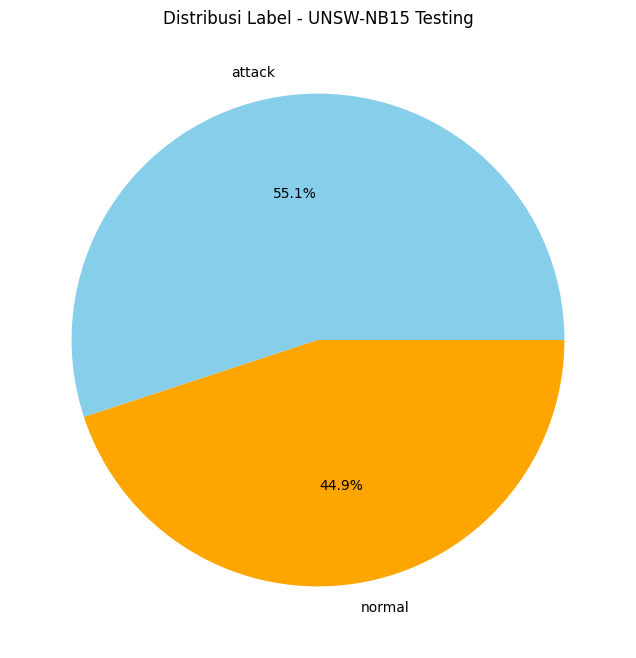

Deskripsi Distribusi Label - UNSW-NB15 Testing:
attack    45332
normal    37000
Name: label, dtype: int64


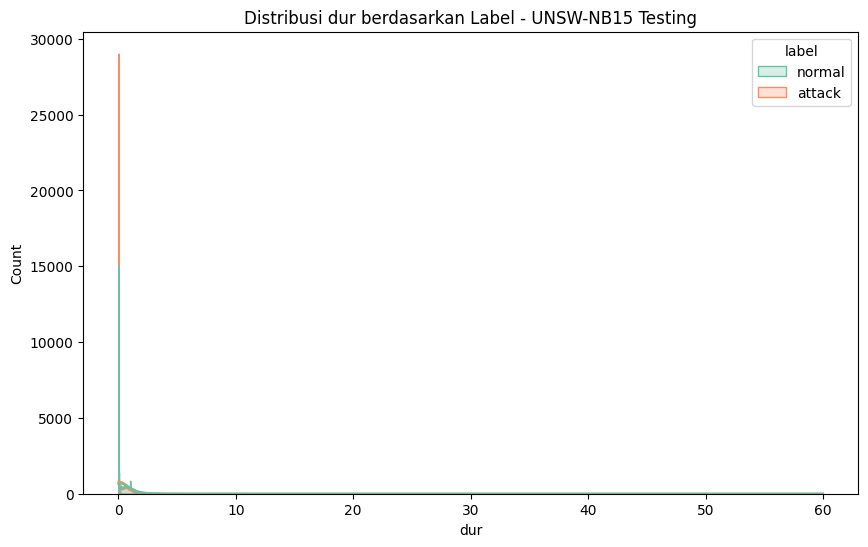


Deskripsi dur - UNSW-NB15 Testing:
          count      mean       std  min       25%       50%       75%  \
label                                                                    
attack  45332.0  1.001882  5.178826  0.0  0.000006  0.000010  0.560336   
normal  37000.0  1.012727  4.063714  0.0  0.002063  0.222841  0.865563   

              max  
label              
attack  59.999527  
normal  59.999989  


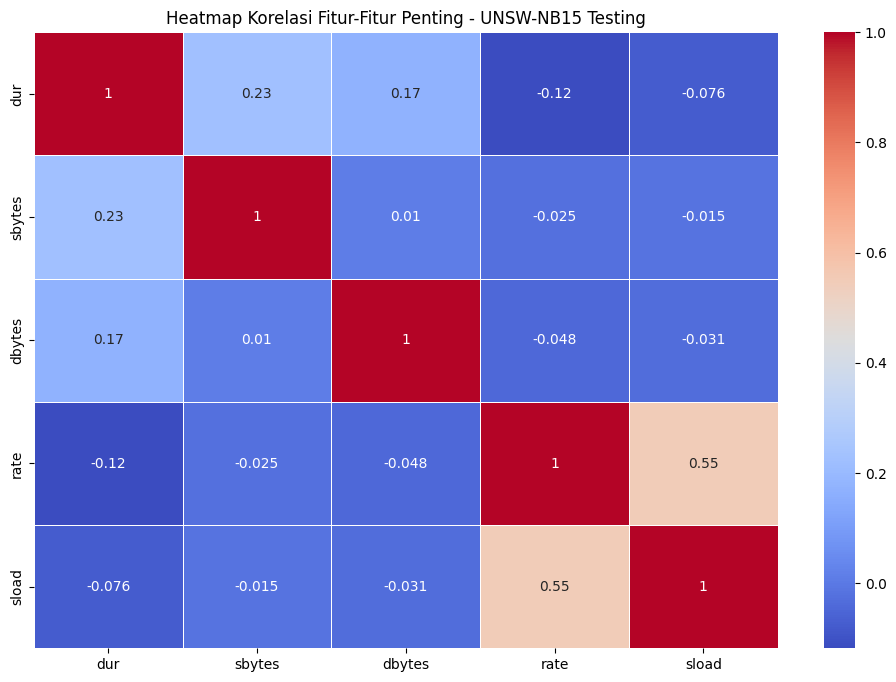


Deskripsi Korelasi Fitur - UNSW-NB15 Testing:
             dur    sbytes    dbytes      rate     sload
dur     1.000000  0.225432  0.172492 -0.118031 -0.076343
sbytes  0.225432  1.000000  0.010036 -0.025102 -0.015228
dbytes  0.172492  0.010036  1.000000 -0.047978 -0.031266
rate   -0.118031 -0.025102 -0.047978  1.000000  0.550104
sload  -0.076343 -0.015228 -0.031266  0.550104  1.000000


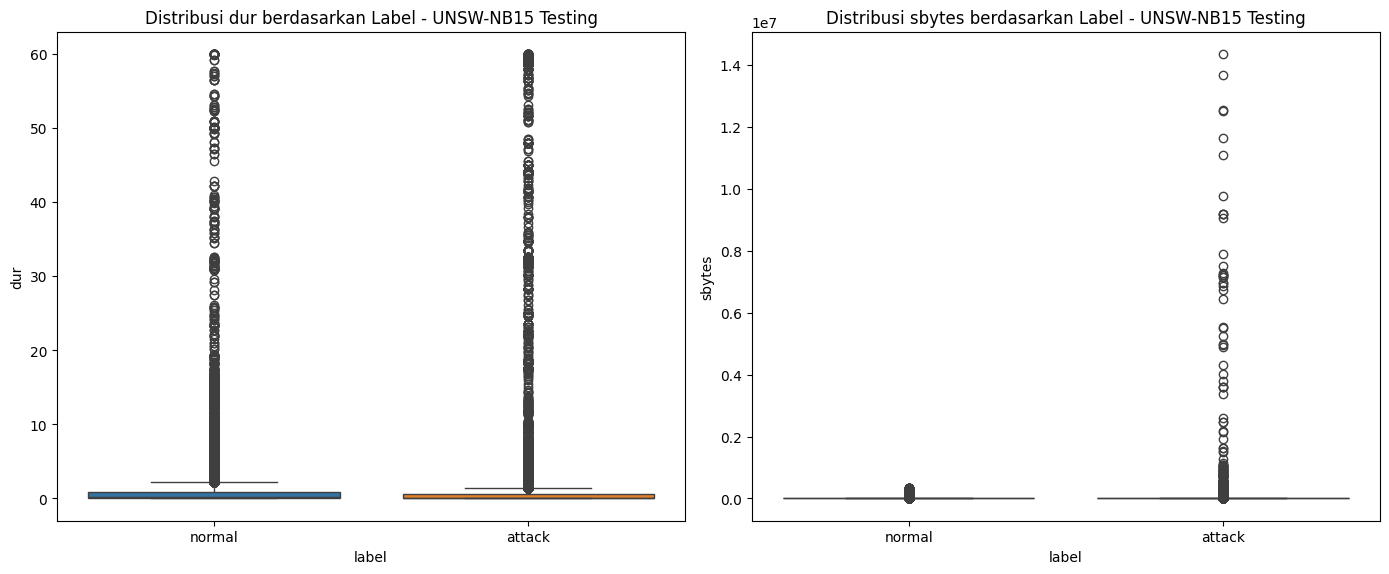


Deskripsi dur dan sbytes - UNSW-NB15 Testing:
            dur                                                         \
          count      mean       std  min       25%       50%       75%   
label                                                                    
attack  45332.0  1.001882  5.178826  0.0  0.000006  0.000010  0.560336   
normal  37000.0  1.012727  4.063714  0.0  0.002063  0.222841  0.865563   

                    sbytes                                                   \
              max    count          mean            std   min    25%    50%   
label                                                                         
attack  59.999527  45332.0  11194.663461  230873.213769  24.0  114.0  200.0   
normal  59.999989  37000.0   4072.377378   14952.978853  46.0  520.0  974.0   

                            
           75%         max  
label                       
attack   822.0  14355774.0  
normal  2334.0    339100.0  


In [10]:
# Visualisasi Distribusi Label
plt.figure(figsize=(8, 8))
df_UNSW_NB15_Testing["label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
plt.title("Distribusi Label - UNSW-NB15 Testing")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi Singkat Tentang Distribusi Label
print("Deskripsi Distribusi Label - UNSW-NB15 Testing:")
label_counts = df_UNSW_NB15_Testing["label"].value_counts()
print(label_counts)

# Pilih fitur-fitur penting untuk analisis lebih lanjut (misalnya, dur, sbytes, dbytes, rate, sload)
features_of_interest_unsw = ["dur", "sbytes", "dbytes", "rate", "sload"]

# Visualisasi Distribusi dur berdasarkan Label
plt.figure(figsize=(10, 6))
sns.histplot(df_UNSW_NB15_Testing, x="dur", hue="label", element="step", palette="Set2", kde=True)
plt.title("Distribusi dur berdasarkan Label - UNSW-NB15 Testing")
plt.xlabel("dur")
plt.ylabel("Count")
plt.show()

# Deskripsi Singkat Tentang dur
print("\nDeskripsi dur - UNSW-NB15 Testing:")
print(df_UNSW_NB15_Testing.groupby("label")["dur"].describe())

# Heatmap Korelasi Fitur-Fitur Penting
plt.figure(figsize=(12, 8))
sns.heatmap(df_UNSW_NB15_Testing[features_of_interest_unsw].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting - UNSW-NB15 Testing")
plt.show()

# Deskripsi Singkat Tentang Korelasi Fitur-Fitur Penting
print("\nDeskripsi Korelasi Fitur - UNSW-NB15 Testing:")
print(df_UNSW_NB15_Testing[features_of_interest_unsw].corr())

# Visualisasi Boxplot untuk Distribusi dur dan sbytes
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="label", y="dur", data=df_UNSW_NB15_Testing, hue="label")
plt.title("Distribusi dur berdasarkan Label - UNSW-NB15 Testing")

plt.subplot(1, 2, 2)
sns.boxplot(x="label", y="sbytes", data=df_UNSW_NB15_Testing, hue="label")
plt.title("Distribusi sbytes berdasarkan Label - UNSW-NB15 Testing")

plt.tight_layout()
plt.show()

# Deskripsi Singkat Tentang Distribusi dur dan sbytes
print("\nDeskripsi dur dan sbytes - UNSW-NB15 Testing:")
print(df_UNSW_NB15_Testing.groupby("label")[["dur", "sbytes"]].describe())


In [13]:
# Membaca dataset UNSW-NB15 Testing dari file parquet
df_UNSW_NB15_Training = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\UNSW-NB15\\UNSW_NB15_training-set.parquet")

# Menampilkan informasi lengkap dari DataFrame
df_UNSW_NB15_Training.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                175341 non-null  float32 
 1   proto              175341 non-null  category
 2   service            175341 non-null  category
 3   state              175341 non-null  category
 4   spkts              175341 non-null  int16   
 5   dpkts              175341 non-null  int16   
 6   sbytes             175341 non-null  int32   
 7   dbytes             175341 non-null  int32   
 8   rate               175341 non-null  float32 
 9   sload              175341 non-null  float32 
 10  dload              175341 non-null  float32 
 11  sloss              175341 non-null  int16   
 12  dloss              175341 non-null  int16   
 13  sinpkt             175341 non-null  float32 
 14  dinpkt             175341 non-null  float32 
 15  sjit               175341 non-null

In [14]:
# Mengubah label 0 menjadi 'normal' dan 1 menjadi 'attack', dan mungkin label 2 (jika ada) ke 'unknown'
df_UNSW_NB15_Training['label'] = df_UNSW_NB15_Training['label'].map({0: 'normal', 1: 'attack', 2: 'unknown'})

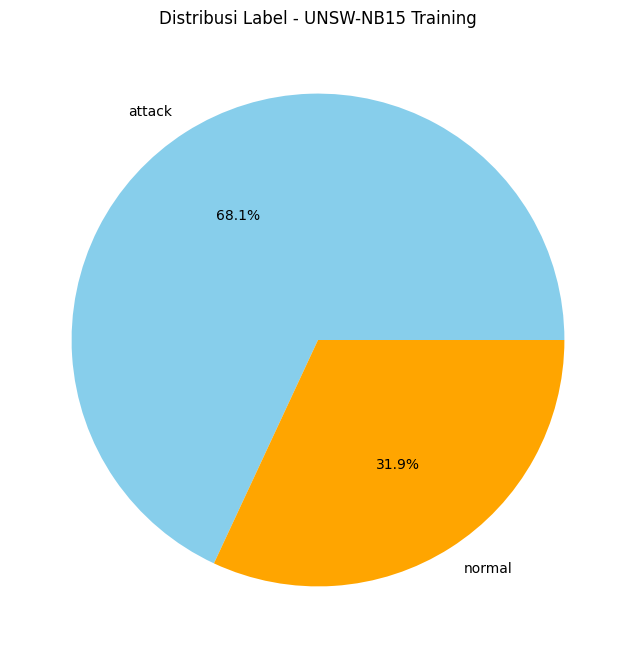

Deskripsi Distribusi Label - UNSW-NB15 Training:
attack    119341
normal     56000
Name: label, dtype: int64


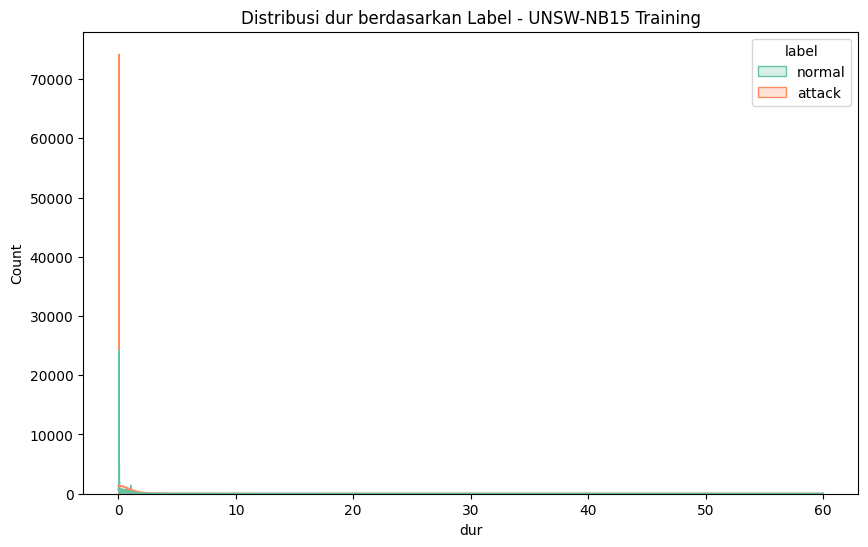


Deskripsi dur - UNSW-NB15 Training:
           count      mean       std  min       25%       50%       75%  \
label                                                                     
attack  119341.0  1.519969  7.109044  0.0  0.000006  0.000009  0.679699   
normal   56000.0  1.017177  4.859242  0.0  0.001718  0.038603  0.639830   

              max  
label              
attack  59.999046  
normal  59.999989  


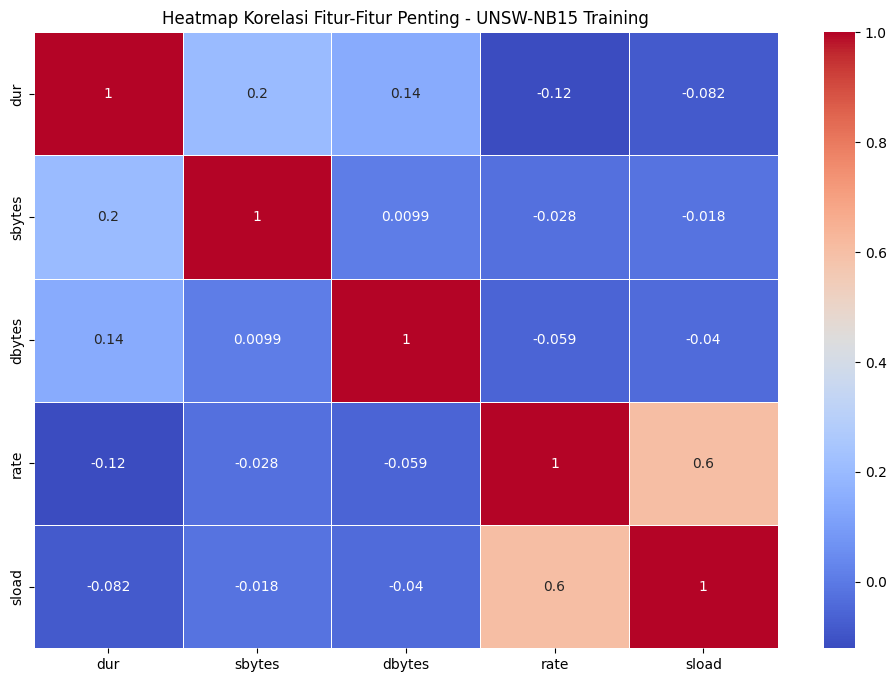


Deskripsi Korelasi Fitur - UNSW-NB15 Training:
             dur    sbytes    dbytes      rate     sload
dur     1.000000  0.199731  0.144134 -0.120966 -0.081749
sbytes  0.199731  1.000000  0.009926 -0.028468 -0.018322
dbytes  0.144134  0.009926  1.000000 -0.059475 -0.040430
rate   -0.120966 -0.028468 -0.059475  1.000000  0.602492
sload  -0.081749 -0.018322 -0.040430  0.602492  1.000000


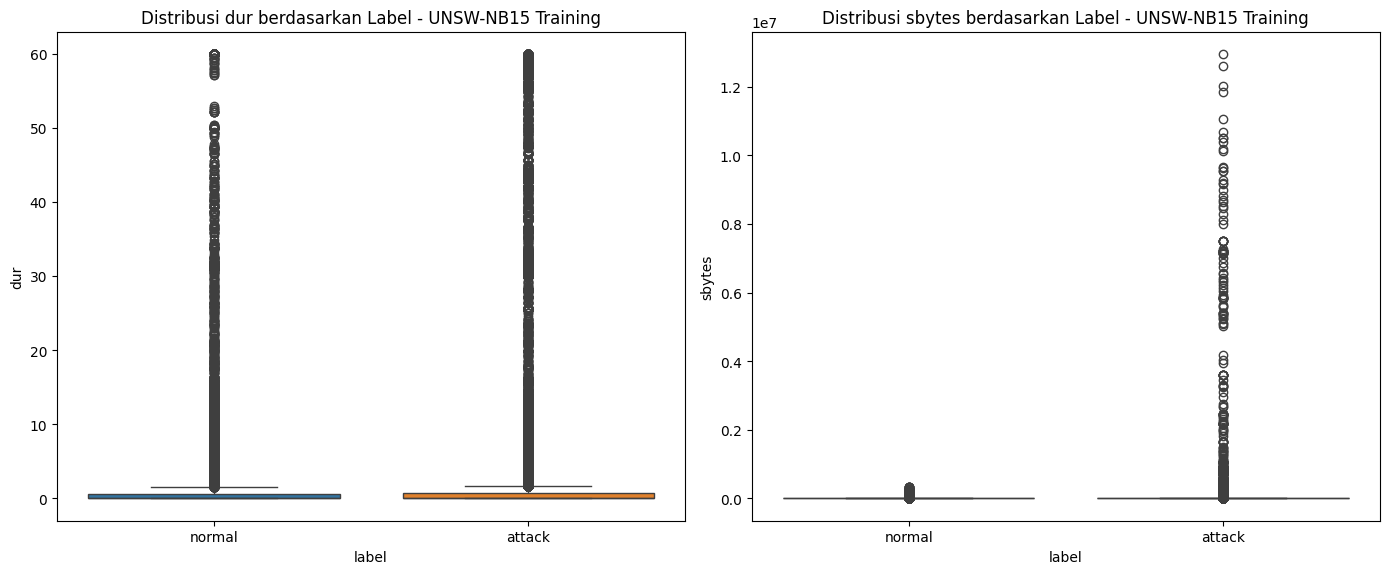


Deskripsi dur dan sbytes - UNSW-NB15 Training:
             dur                                                         \
           count      mean       std  min       25%       50%       75%   
label                                                                     
attack  119341.0  1.519969  7.109044  0.0  0.000006  0.000009  0.679699   
normal   56000.0  1.017177  4.859242  0.0  0.001718  0.038603  0.639830   

                     sbytes                                                    \
              max     count          mean            std   min    25%     50%   
label                                                                           
attack  59.999046  119341.0  11068.655357  211658.592325  60.0  114.0   200.0   
normal  59.999989   56000.0   4105.702929   11348.053814  28.0  424.0  1470.0   

                            
           75%         max  
label                       
attack   848.0  12965233.0  
normal  3401.5    338718.0  


In [15]:
# Visualisasi Distribusi Label (0: Normal, 1: Attack)
plt.figure(figsize=(8, 8))
df_UNSW_NB15_Training["label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
plt.title("Distribusi Label - UNSW-NB15 Training")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi Singkat Tentang Distribusi Label
print("Deskripsi Distribusi Label - UNSW-NB15 Training:")
label_counts = df_UNSW_NB15_Training["label"].value_counts()
print(label_counts)

# Pilih fitur-fitur penting untuk analisis lebih lanjut (misalnya, dur, sbytes, dbytes, rate, sload)
features_of_interest_unsw = ["dur", "sbytes", "dbytes", "rate", "sload"]

# Visualisasi Distribusi dur berdasarkan Label
plt.figure(figsize=(10, 6))
sns.histplot(df_UNSW_NB15_Training, x="dur", hue="label", element="step", palette="Set2", kde=True)
plt.title("Distribusi dur berdasarkan Label - UNSW-NB15 Training")
plt.xlabel("dur")
plt.ylabel("Count")
plt.show()

# Deskripsi Singkat Tentang dur
print("\nDeskripsi dur - UNSW-NB15 Training:")
print(df_UNSW_NB15_Training.groupby("label")["dur"].describe())

# Heatmap Korelasi Fitur-Fitur Penting
plt.figure(figsize=(12, 8))
sns.heatmap(df_UNSW_NB15_Training[features_of_interest_unsw].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting - UNSW-NB15 Training")
plt.show()

# Deskripsi Singkat Tentang Korelasi Fitur-Fitur Penting
print("\nDeskripsi Korelasi Fitur - UNSW-NB15 Training:")
print(df_UNSW_NB15_Training[features_of_interest_unsw].corr())

# Visualisasi Boxplot untuk Distribusi dur dan sbytes
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="label", y="dur", data=df_UNSW_NB15_Training, hue="label")
plt.title("Distribusi dur berdasarkan Label - UNSW-NB15 Training")

plt.subplot(1, 2, 2)
sns.boxplot(x="label", y="sbytes", data=df_UNSW_NB15_Training, hue="label")
plt.title("Distribusi sbytes berdasarkan Label - UNSW-NB15 Training")

plt.tight_layout()
plt.show()

# Deskripsi Singkat Tentang Distribusi dur dan sbytes
print("\nDeskripsi dur dan sbytes - UNSW-NB15 Training:")
print(df_UNSW_NB15_Training.groupby("label")[["dur", "sbytes"]].describe())
